# MNIST handwritten digit prediction

The results are slightly different from the slide because random state is not fixed for SGD.

## 1. Environment


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import pandas as pd

In [20]:
!python --version

Python 3.7.15


In [3]:
tf.__version__

'2.9.2'

In [4]:
!nvidia-smi

Tue Nov 15 19:33:05 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 2. Prepare Datasets

In [5]:
# Load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


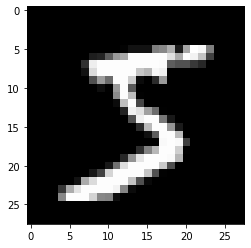

In [7]:
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [8]:
y_train[0]

5

Note: MNIST dataset is already split into train/test 60000/10000 automatically

In [9]:
# Reshape
x_train = x_train.reshape((x_train.shape[0],28,28,1))
print(x_train.shape)
x_test = x_test.reshape((x_test.shape[0],28,28,1))
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:

# Label encoding
y_train = to_categorical(y_train)
print(y_train.shape)
y_test = to_categorical(y_test)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [11]:
# Split train dataset into train and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=123)
print(x_train.shape)
print(x_val.shape)

(54000, 28, 28, 1)
(6000, 28, 28, 1)


## 3. Model Building & Hyperparameter Tuning

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(48, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 24)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2352)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [24]:
d_val = {}
learn_rate = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 1]
for lr in learn_rate:
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(48, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10)
    d_val[lr] = history

Epoch 1/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.3265 - accuracy: 0.0374 - val_loss: 2.3225 - val_accuracy: 0.0417
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3206 - accuracy: 0.0424 - val_loss: 2.3167 - val_accuracy: 0.0468
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.3147 - accuracy: 0.0473 - val_loss: 2.3111 - val_accuracy: 0.0543
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.3090 - accuracy: 0.0536 - val_loss: 2.3055 - val_accuracy: 0.0620
Epoch 5/10
1688/1688 [==============================] - 8s 4ms/step - loss: 2.3034 - accuracy: 0.0599 - val_loss: 2.3000 - val_accuracy: 0.0700
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.2979 - accuracy: 0.0678 - val_loss: 2.2946 - val_accuracy: 0.0770
Epoch 7/10
1688/1688 [==============================] - 8s 4ms/step - loss: 2.2924 - accuracy: 0.0769 - val_loss: 2.2892 - val_accuracy:

In [25]:
def plot_accuracy(history, lr, color):
  
  # The history object contains results on the training and test
  # sets for each epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Get the number of epochs
    epochs = range(len(acc))

    train_label = f'Train lr={lr}'
    val_label = f'Val lr={lr}'

    
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, color=color, dashes=[6,2], label=train_label)
    plt.plot(epochs, val_acc, color=color, label=val_label)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')



In [26]:
def plot_loss(history, lr, color):
  
  # The history object contains results on the training and test
  # sets for each epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(len(loss))

    train_label = f'Train lr={lr}'
    val_label = f'Val lr={lr}'

    
    plt.title('Training and validation LOSS')
    plt.plot(epochs, loss, color=color, dashes=[6,2], label=train_label)
    plt.plot(epochs, val_loss, color=color, label=val_label)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')


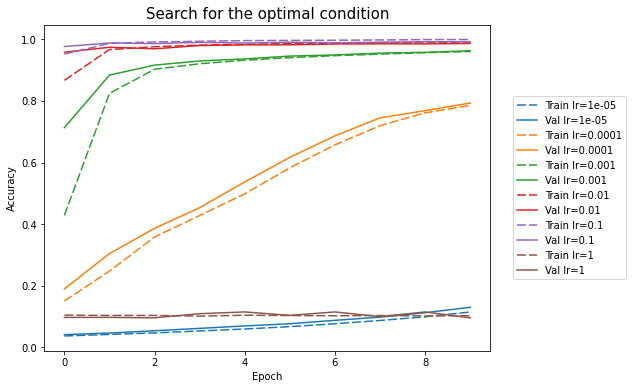

In [28]:
import matplotlib.colors as mcolors
colors = mcolors.TABLEAU_COLORS
plt.figure(figsize=(8,6))
for (key, value), color in zip(d_val.items(), colors):
    plot_accuracy(value, key, color)
plt.title("Search for the optimal condition", fontsize=15)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", prop={'size': 10});


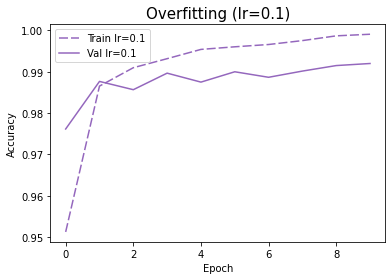

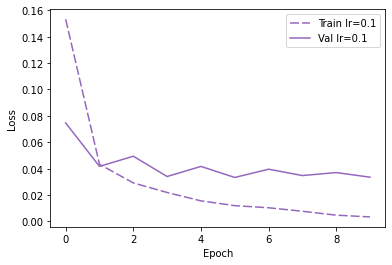

In [29]:
plot_accuracy(d_val[0.1],0.1,'#9467bd')
plt.title("Overfitting (lr=0.1)", fontsize=15)
plt.legend()
_ = plt.figure()
plot_loss(d_val[0.1],0.1,'#9467bd')
plt.legend()
plt.title("");



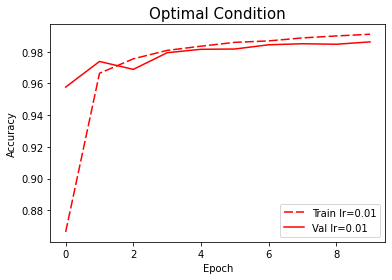

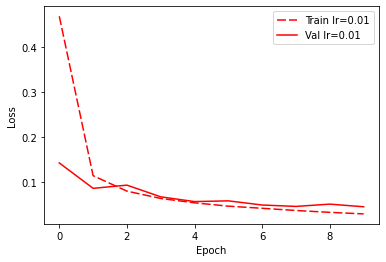

In [30]:
plot_accuracy(d_val[0.01],0.01,'red')
plt.title("Optimal Condition", fontsize=15)
plt.legend()
_ = plt.figure()
plot_loss(d_val[0.01],0.01,'red')
plt.legend()
plt.title("");


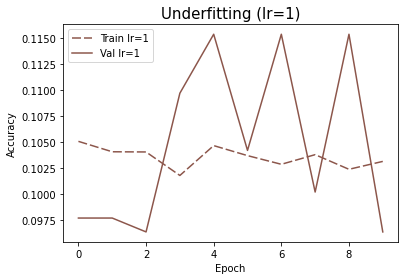

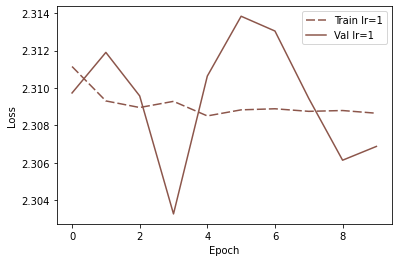

In [31]:
plot_accuracy(d_val[1],1,'#8c564b')
plt.title("Underfitting (lr=1)", fontsize=15)
plt.legend()
_ = plt.figure()
plot_loss(d_val[1],1,'#8c564b')
plt.legend()
plt.title("");


In [32]:
def get_accuracy(history):
    train = history.history['accuracy'][-1]
    val = history.history['val_accuracy'][-1]
    return train, val

In [33]:
lr_list = []
train_list = []
val_list = []

for key, value in d_val.items():
    train, val = get_accuracy(value)
    lr_list.append(str(key))
    train_list.append(round(train,4))
    val_list.append(round(val,4))

In [35]:
df_val = pd.DataFrame(list(zip(lr_list, train_list, val_list)), columns = ['learning_rate', 'train_acc', 'val_acc'])
df_val

,learning_rate,train_acc,val_acc
0,1e-05,0.1151,0.1303
1,0.0001,0.7851,0.7928
2,0.001,0.9600,0.9625
3,0.01,0.9910,0.9862
4,0.1,0.9991,0.9920
5,1,0.1031,0.0963


In [36]:
d = {}
learn_rate = [10e-3]
for lr in learn_rate:
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, (5,5), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(48, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4445 - accuracy: 0.8675 - val_loss: 0.1342 - val_accuracy: 0.9591
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1180 - accuracy: 0.9654 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 3/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0629 - val_accuracy: 0.9798
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0542 - val_accuracy: 0.9815
Epoch 5/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0555 - accuracy: 0.9828 - val_loss: 0.0426 - val_accuracy: 0.9854
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0479 - accuracy: 0.9855 - val_loss: 0.0413 - val_accuracy: 0.9858
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0425 - accuracy: 0.9876 - val_loss: 0.0595 - val_accuracy: